In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import tensorflow.keras as keras
from sklearn.metrics import mean_squared_error, mean_absolute_error
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import plot_model

Load train and test data

In [ ]:
X_train = pd.read_csv("./data/X_train_lstm.csv")
X_test = pd.read_csv("./data/X_test_lstm.csv")

Y_train = pd.read_csv("./data/Y_train_lstm.csv")
Y_test = pd.read_csv("./data/Y_test_lstm.csv")

Load LSTM model

In [ ]:
lstm_model = keras.models.load_model("./models/lstm_model.keras")

In [8]:
Y_pred = lstm_model.predict(X_test)
Y_pred = pd.DataFrame(Y_pred, columns=Y_test.columns)

3827/3827 [==============================] - 25s 6ms/step


MSE and MAE

In [6]:
mean_squared_error(Y_test, Y_pred)

361.1148094700631

In [7]:
mean_absolute_error(Y_test, Y_pred)  # mins

10.083698641605949

Standard deviation

In [8]:
for col in Y_pred.columns:
    print(col)
    print(Y_test[col].std(), Y_pred[col].std())

DELAY_DUE_CARRIER
25.567373882087463 7.6205435
DELAY_DUE_WEATHER
11.406046218751655 0.93484366
DELAY_DUE_SECURITY
2.4229327308810777 0.12023699
DELAY_DUE_NAS
19.65953564135613 11.143993
DELAY_DUE_LATE_AIRCRAFT
29.452996135802763 9.612298


Mean of predictions

In [9]:
Y_pred.mean()

DELAY_DUE_CARRIER          16.751114
DELAY_DUE_WEATHER           2.335597
DELAY_DUE_SECURITY          0.190225
DELAY_DUE_NAS              11.991378
DELAY_DUE_LATE_AIRCRAFT    18.397444
dtype: float32

### Plot box plots of predicted test labels and true labels

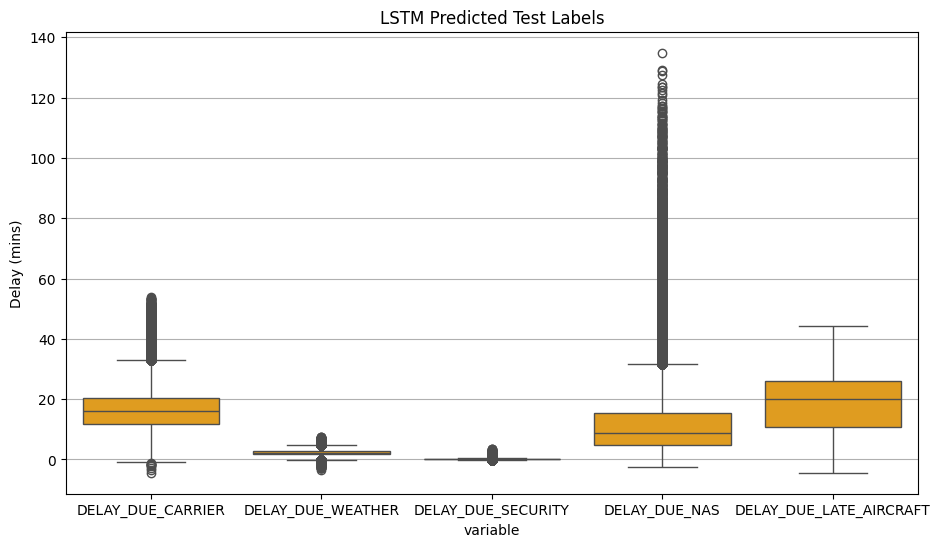

In [10]:
plt.figure(figsize=(11, 6))
plt.grid()
sns.boxplot(Y_pred.melt(), x="variable", y="value", color="orange")
plt.title('LSTM Predicted Test Labels')
plt.ylabel("Delay (mins)")
plt.show()

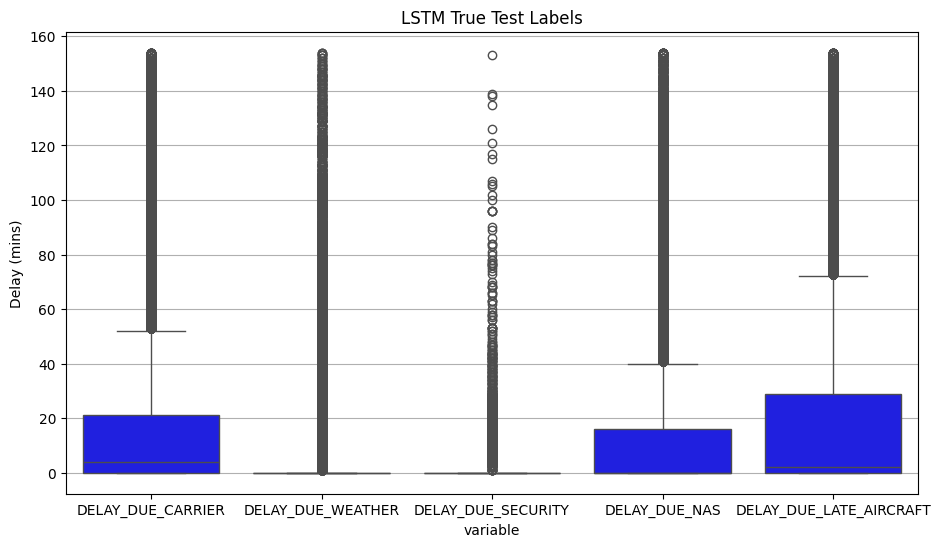

In [11]:
plt.figure(figsize=(11, 6))
plt.grid()
sns.boxplot(Y_test.melt(), x="variable", y="value", color="blue")
plt.title('LSTM True Test Labels')
plt.ylabel("Delay (mins)")
plt.show()

In [ ]:
hybrid_model = keras.models.load_model("./models/hybrid_model.keras")

In [13]:
plot_model(hybrid_model,to_file="hybrid_model_architecture.png", show_shapes=True, show_layer_names=False)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [14]:
Y_pred = hybrid_model.predict(X_test)

3827/3827 [==============================] - 13s 3ms/step


In [15]:
mean_squared_error(Y_test, Y_pred)

370.4797229216997

In [16]:
mean_absolute_error(Y_test, Y_pred)

10.5174843329492